# Fondo transizione industriale

In [2]:
import pyarrow.parquet as pq
import pandas as pd
import duckdb
import os
os.chdir('D:/duckdb/files/RNA2/')

con = duckdb.connect()
con.execute("PRAGMA threads=8")
con.execute("PRAGMA enable_object_cache") 
pd.options.display.float_format = '{:,}'.format
df =(con.execute("SELECT * FROM '*.parquet' where CAR = '27929' order by concessione desc").df())

In [17]:
df['NOMINALE'].sum()/1000000


37.66737432000001

In [15]:
df.head()

,CAR,MISURA,COD_CE_MISURA,BASE_GIURIDICA_NAZIONALE,CONCEDENTE,COR,TITOLO_PROGETTO,DESCRIZIONE_PROGETTO,CONCESSIONE,ATTO_CONCESSIONE,...,CF,DES_TIPO_BENEFICIARIO,REGIONE,ID_COMPONENTE_AIUTO,DES_PROCEDIMENTO,DESSETTORE_ATTIVITA_OBIETTIVO,SETTORE_ATTIVITA,DES_STRUMENTO,AIUTO,NOMINALE
0,27929,Fondo per il sostegno alla transizione industr...,SA.110221,Decreto interministeriale 21 ottobre 2022 - Fo...,INVITALIA - AGENZIA NAZIONALE PER L'ATTRAZIONE...,23265345,ENERGY CONSUMPTION SAVINGS,Il progetto si compone dei seguenti interventi...,2025-01-21,Delibera,...,00717800247,Grande impresa,Toscana,25852888,Esenzione,Aiuti per la tutela dell'ambiente | Aiuti agli...,C.23.1,Sovvenzione/Contributo in conto interessi,"1,764,900.0","1,764,900.0"
1,27929,Fondo per il sostegno alla transizione industr...,SA.110221,Decreto interministeriale 21 ottobre 2022 - Fo...,INVITALIA - AGENZIA NAZIONALE PER L'ATTRAZIONE...,23265345,ENERGY CONSUMPTION SAVINGS,Il progetto si compone dei seguenti interventi...,2025-01-21,Delibera,...,00717800247,Grande impresa,Toscana,25852887,Esenzione,Aiuti per la tutela dell'ambiente | Aiuti agli...,C.23.1,Sovvenzione/Contributo in conto interessi,"1,667,738.0","1,667,738.0"
2,27929,Fondo per il sostegno alla transizione industr...,SA.110221,Decreto interministeriale 21 ottobre 2022 - Fo...,INVITALIA - AGENZIA NAZIONALE PER L'ATTRAZIONE...,23265342,WATER CONSUMPTION SAVINGS,Il progetto prevede la realizzazione di una va...,2025-01-21,Delibera,...,00717800247,Grande impresa,Toscana,25852886,Esenzione,Aiuti per la tutela dell'ambiente | Aiuti agli...,C.23.1,Sovvenzione/Contributo in conto interessi,"1,092,383.6","1,092,383.6"
3,27929,Fondo per il sostegno alla transizione industr...,SA.110221,Decreto interministeriale 21 ottobre 2022 - Fo...,INVITALIA - AGENZIA NAZIONALE PER L'ATTRAZIONE...,23257872,Progetto efficentamento energetico,Progetto costituito da tre interventi per la ...,2025-01-08,Delibera,...,00712180165,Grande impresa,Lombardia,25843691,Esenzione,Aiuti per la tutela dell'ambiente | Aiuti agli...,C.21.1,Sovvenzione/Contributo in conto interessi,"1,072,542.6","1,072,542.6"
4,27929,Fondo per il sostegno alla transizione industr...,SA.110221,Decreto interministeriale 21 ottobre 2022 - Fo...,INVITALIA - AGENZIA NAZIONALE PER L'ATTRAZIONE...,23257872,Progetto efficentamento energetico,Progetto costituito da tre interventi per la ...,2025-01-08,Delibera,...,00712180165,Grande impresa,Lombardia,25843689,Esenzione,Aiuti per la tutela dell'ambiente | Aiuti agli...,C.21.1,Sovvenzione/Contributo in conto interessi,"1,145,144.7","1,145,144.7"


In [12]:
# pip install pyperclip
import pyperclip


# Generare la descrizione statistica
desc = df.describe()

# Convertire in Markdown
markdown_table = desc.to_markdown()

# Copiare negli appunti
desc.to_clipboard(excel=False)

# Stampare l'output Markdown (opzionale)
print(markdown_table)

|       | CONCESSIONE                |            AIUTO |         NOMINALE |
|:------|:---------------------------|-----------------:|-----------------:|
| count | 42                         |     42           |     42           |
| mean  | 2024-12-15 04:34:17.142857 | 896842           | 896842           |
| min   | 2024-11-21 00:00:00        |   6654           |   6654           |
| 25%   | 2024-12-05 06:00:00        | 324975           | 324975           |
| 50%   | 2024-12-10 00:00:00        | 719529           | 719529           |
| 75%   | 2024-12-21 00:00:00        |      1.28083e+06 |      1.28083e+06 |
| max   | 2025-01-21 00:00:00        |      3.58136e+06 |      3.58136e+06 |
| std   | nan                        | 777162           | 777162           |


<Axes: >

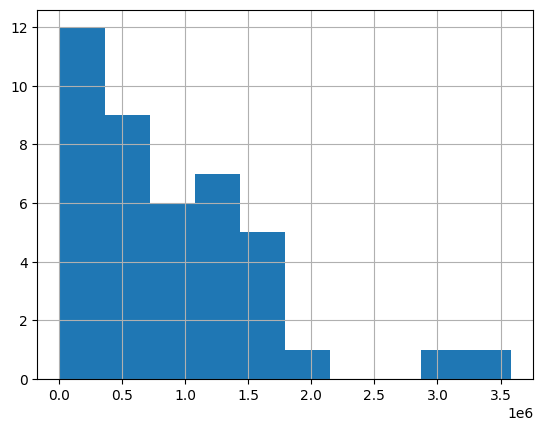

In [13]:
df['NOMINALE'].hist()

In [14]:
df['NOMINALE'].describe()

count                 42.0
mean    896,842.2457142859
std      777,161.938712291
min                6,654.0
25%              324,975.0
50%            719,529.175
75%         1,280,833.2475
max           3,581,357.84
Name: NOMINALE, dtype: float64

C:\Users\PVolterr\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


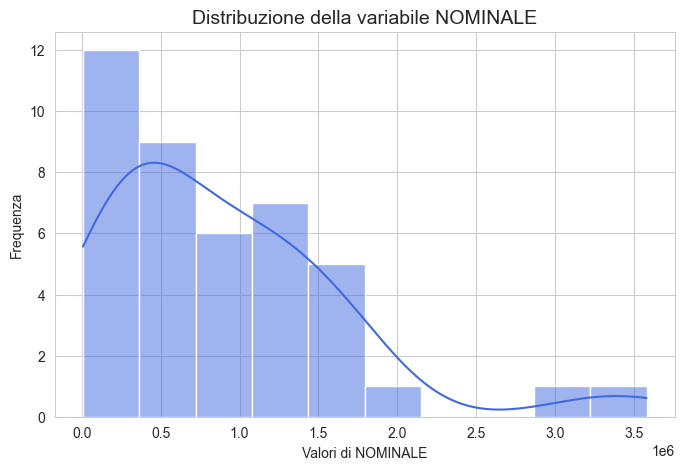

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


# Creare l'istogramma con Seaborn
sns.set_style("whitegrid")  # Stile estetico
plt.figure(figsize=(8, 5))  # Dimensione del grafico
sns.histplot(df["NOMINALE"], bins=10, kde=True, color="royalblue")

# Titoli e etichette
plt.title("Distribuzione della variabile NOMINALE", fontsize=14)
plt.xlabel("Valori di NOMINALE")
plt.ylabel("Frequenza")

# Mostrare il grafico
plt.show()


C:\Users\PVolterr\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


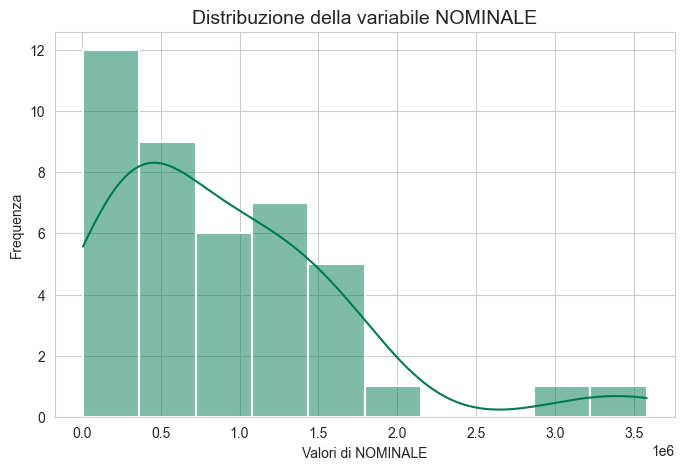

In [19]:
# Creare il grafico
sns.set_style("whitegrid")  # Stile estetico
fig, ax = plt.subplots(figsize=(8, 5))  # Dimensione del grafico

# Istogramma con colore personalizzato
sns.histplot(df["NOMINALE"], bins=10, kde=True, color="#007a53", linewidth=1.5, ax=ax)

# Titoli e etichette
ax.set_title("Distribuzione della variabile NOMINALE", fontsize=14)
ax.set_xlabel("Valori di NOMINALE")
ax.set_ylabel("Frequenza")

# Mostrare il grafico
plt.show()

In [21]:
sorted(df['IMPRESA'].unique().tolist())


['ACCIAIERIE DI VERONA S.P.A.',
 'BARILLA G. E R. FRATELLI - SOCIETA&#39; PER AZIONI',
 'BOTTO GIUSEPPE E FIGLI - S.P.A.',
 'BUZZI UNICEM S.R.L.',
 'CARTIERA DEL VIGNALETTO S.R.L.',
 'FA.IN.PLAST. - FARAOTTI INDUSTRIE PLASTICHE - S.R.L. PIU&#39; BREVEMENTE FAINPLAST S.R.L.',
 'FINCHIMICA S.P.A.',
 'IN.AL.PI. S.P.A.',
 'INDENA SPA',
 'ITALCHIMICA S.R.L.',
 'MANUCOR S.P.A.',
 'MODINE CIS ITALY S.R.L.',
 'OCV ITALIA S.R.L.',
 'RIFINIZIONE*S. STEFANO S.P.A.',
 'SKF INDUSTRIE  S.P.A.',
 'SKF INDUSTRIE S.P.A.',
 'TEKSID ALUMINUM S.R.L.',
 'VINAVIL SPA',
 'ZIGNAGO VETRO S.P.A. CON LA SIGLA Z.V. S.P.A.']

In [24]:
# Estrarre i valori unici, ordinarli e scriverli di seguito
impresa_str = ", ".join(sorted(df['IMPRESA'].dropna().unique().tolist()))

# Stampare il risultato
print(impresa_str)

ACCIAIERIE DI VERONA S.P.A., BARILLA G. E R. FRATELLI - SOCIETA' PER AZIONI, BOTTO GIUSEPPE E FIGLI - S.P.A., BUZZI UNICEM S.R.L., CARTIERA DEL VIGNALETTO S.R.L., FA.IN.PLAST. - FARAOTTI INDUSTRIE PLASTICHE - S.R.L. PIU' BREVEMENTE FAINPLAST S.R.L., FINCHIMICA S.P.A., IN.AL.PI. S.P.A., INDENA SPA, ITALCHIMICA S.R.L., MANUCOR S.P.A., MODINE CIS ITALY S.R.L., OCV ITALIA S.R.L., RIFINIZIONE*S. STEFANO S.P.A., SKF INDUSTRIE  S.P.A., SKF INDUSTRIE S.P.A., TEKSID ALUMINUM S.R.L., VINAVIL SPA, ZIGNAGO VETRO S.P.A. CON LA SIGLA Z.V. S.P.A.
